In [31]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


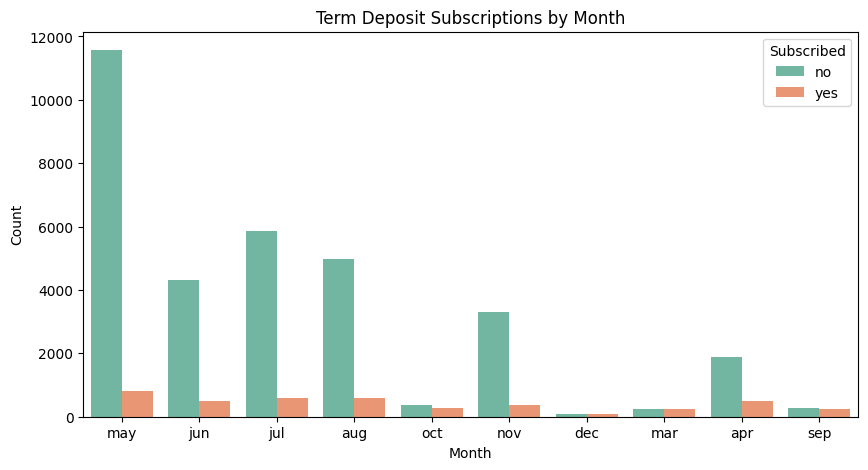

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.figure(figsize=(10,5))
sns.countplot(data=campaign, x='month', hue='y', palette='Set2')
plt.title('Term Deposit Subscriptions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.show()

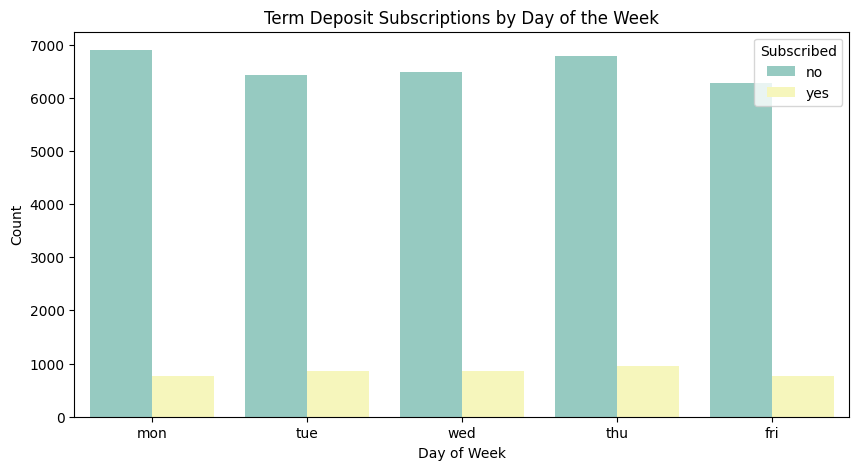

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data=campaign, x='day_of_week', hue='y', palette='Set3')
plt.title('Term Deposit Subscriptions by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.show()

Accuracy: 0.898300512543836

Classification Report:

              precision    recall  f1-score   support

          No       0.90      0.99      0.95      6572
         Yes       0.72      0.17      0.28       842

    accuracy                           0.90      7414
   macro avg       0.81      0.58      0.61      7414
weighted avg       0.88      0.90      0.87      7414

0.898300512543836


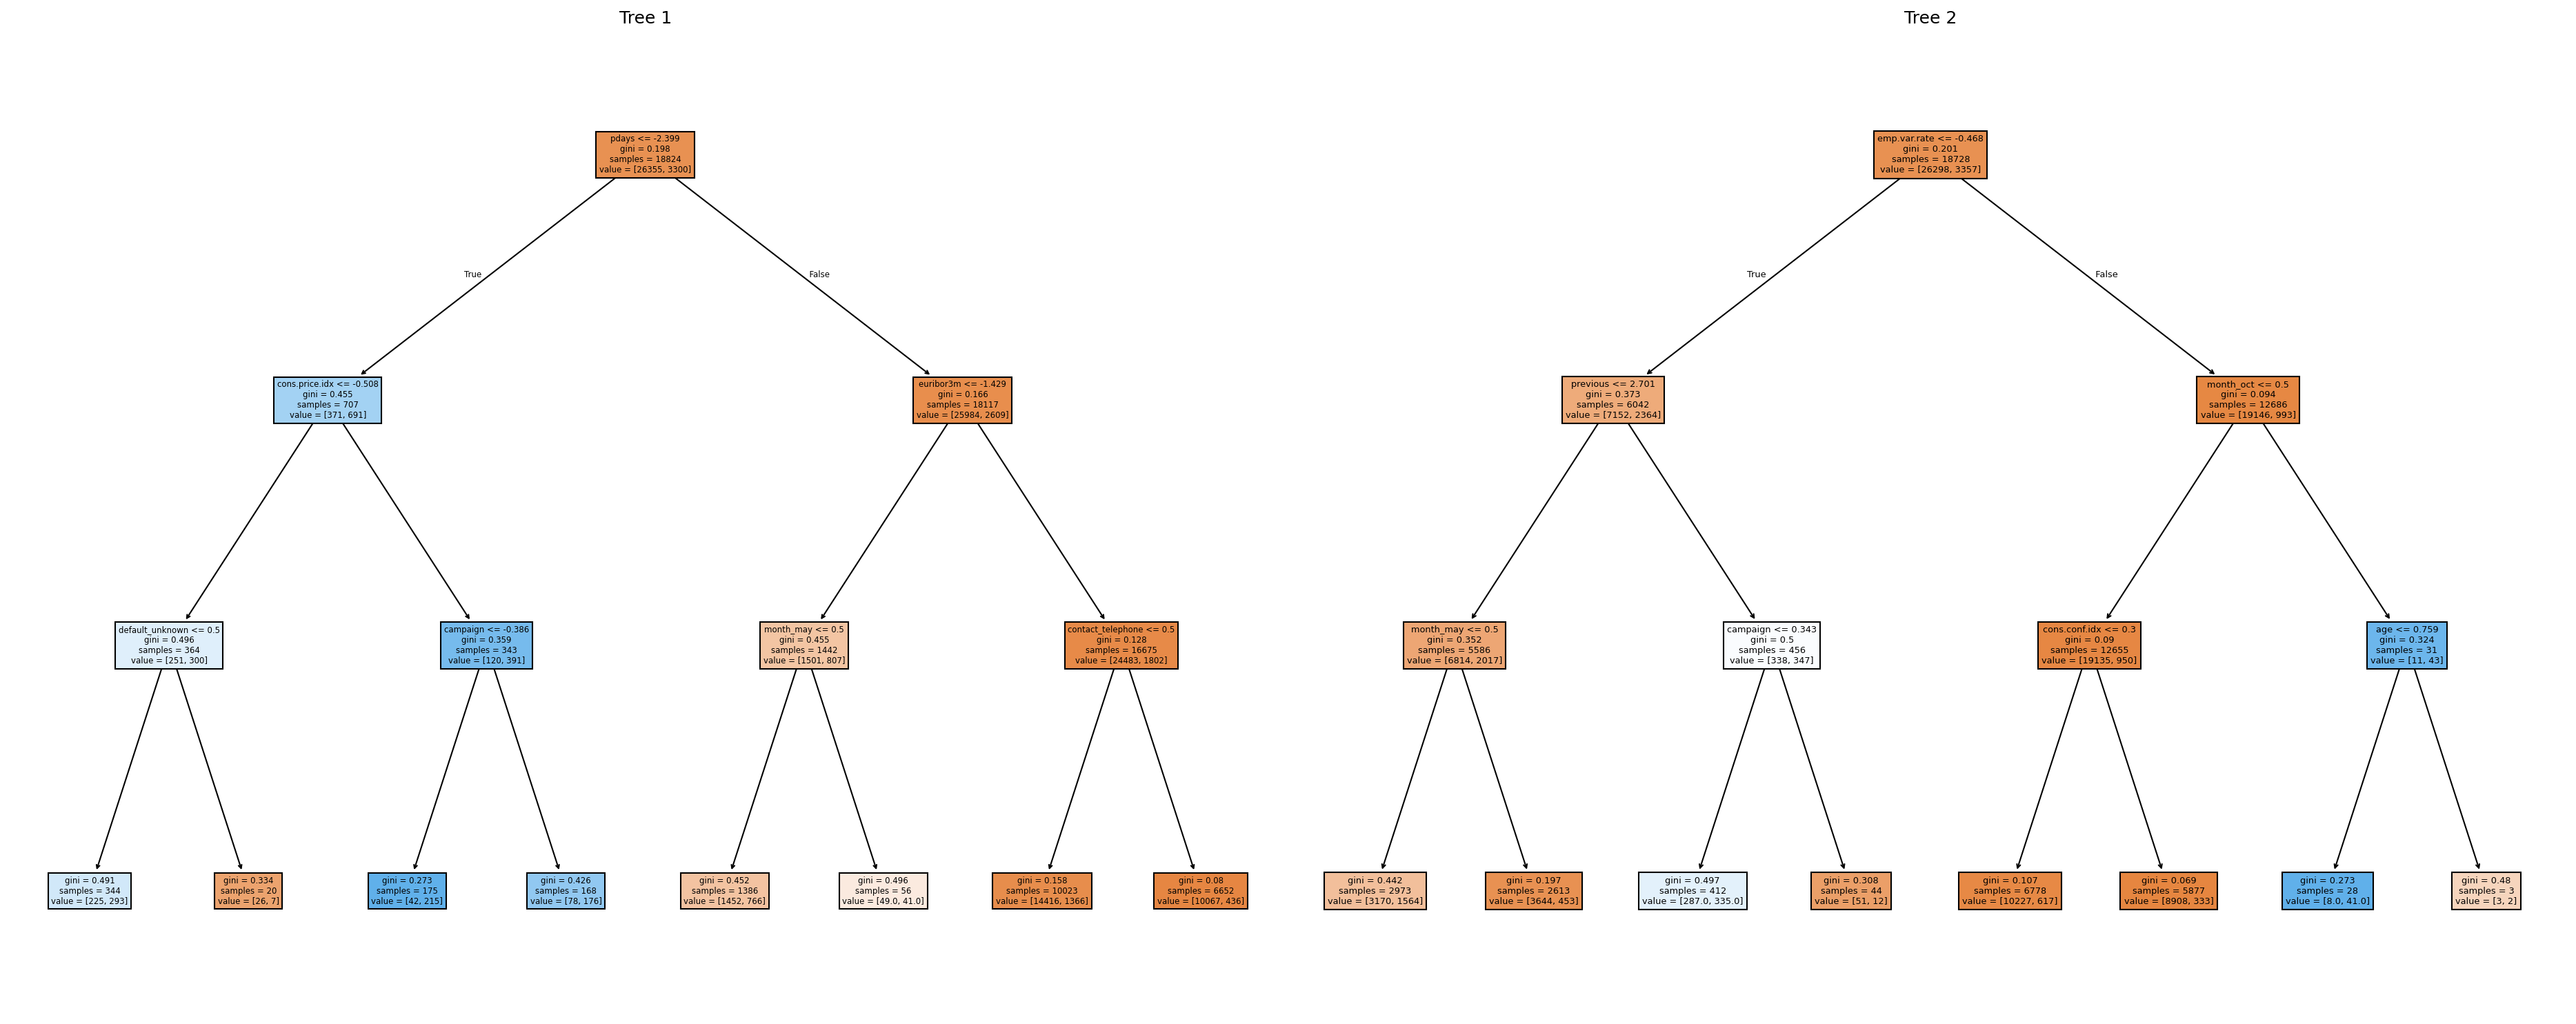

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



df = pd.get_dummies(campaign, drop_first=True)

X = df.drop('y_yes', axis=1)
y = df['y_yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
cols_to_scale = ['age', 'campaign', 'pdays', 'previous',
                 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                 'euribor3m', 'nr.employed']

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


rf = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", rf.score(X_test, y_test))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No","Yes"]))

print(rf.score(X_test, y_test))
fn = X.columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10), dpi=150)
for index in range(2):
  tree.plot_tree(
      rf.estimators_[index],
      feature_names=fn,
      filled=True,
      ax=axes[index]
  )
  axes[index].set_title(f'Tree {index+1}')
fig.tight_layout()
plt.show()

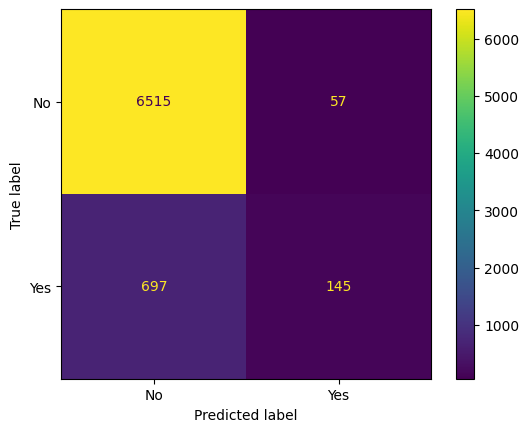

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No","Yes"])
disp.plot()
plt.show()